In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The objective of this notebook is to translate the data between periodic systems.

That is, given two different periodic systems, we want to have the data in both formats without having to perform the whole preprocessing using the new PS

In [2]:
t1 = np.load("Data/R_Tables_P0.npy")
t2 = np.load("Data/R_Tables_P1.npy")
t3 = np.load("Data/R_Tables_P2.npy")

t = np.concatenate([t1,t2,t3],axis=0)
print(t.shape)

(6145, 7, 32)


## This is how the data look represented on this chosen PT (Mendeleev's). We could, for many reasons, test different PTs to represent the same data.

### There is no need to run again the whole data production program, instead we ought to translate the data.

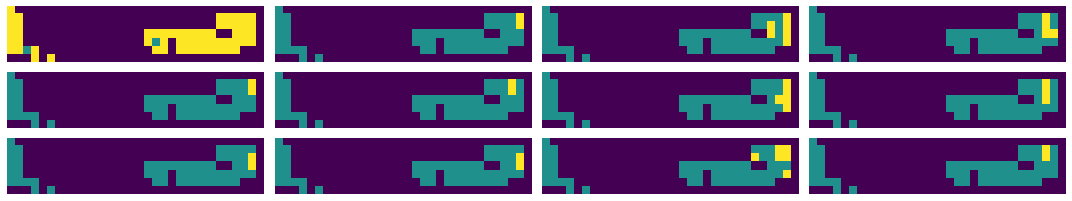

In [6]:
N = 3
fig = plt.figure(figsize=(15,3))
for i in range(4*N):
    ax = fig.add_subplot(N,4,i+1)
    ax.imshow(t[i])
    ax.axis('off')
plt.tight_layout()

In [218]:
def getRandPT(TP):
    """Generate random PTs as example"""
    elems = TP.keys()

    rows,cols = np.meshgrid(np.arange(6),np.arange(32))
    posit = np.stack([rows,cols]).reshape(2,-1)   #All possible positions, as (x,y) pairs
    #Do random index permutation and pick only len(elems) first
    rndn = np.random.permutation(posit.shape[1])[:len(elems)]  
    posit = posit[:,rndn].T   #Shuffle elements

    # Create a dict: final PT
    return dict(zip(elems,posit))
    
def translate(data,PT1,PT2):
    """Translate data from PT1 to PT2"""
    newTP = data.copy()*0.0 - 1.

    for elem in PT1.keys():
        x2,y2 = PT2[elem]
        x1,y1 = PT1[elem]
        
        newTP[:,x2,y2] = data[:,x1,y1].copy()
        
    return newTP

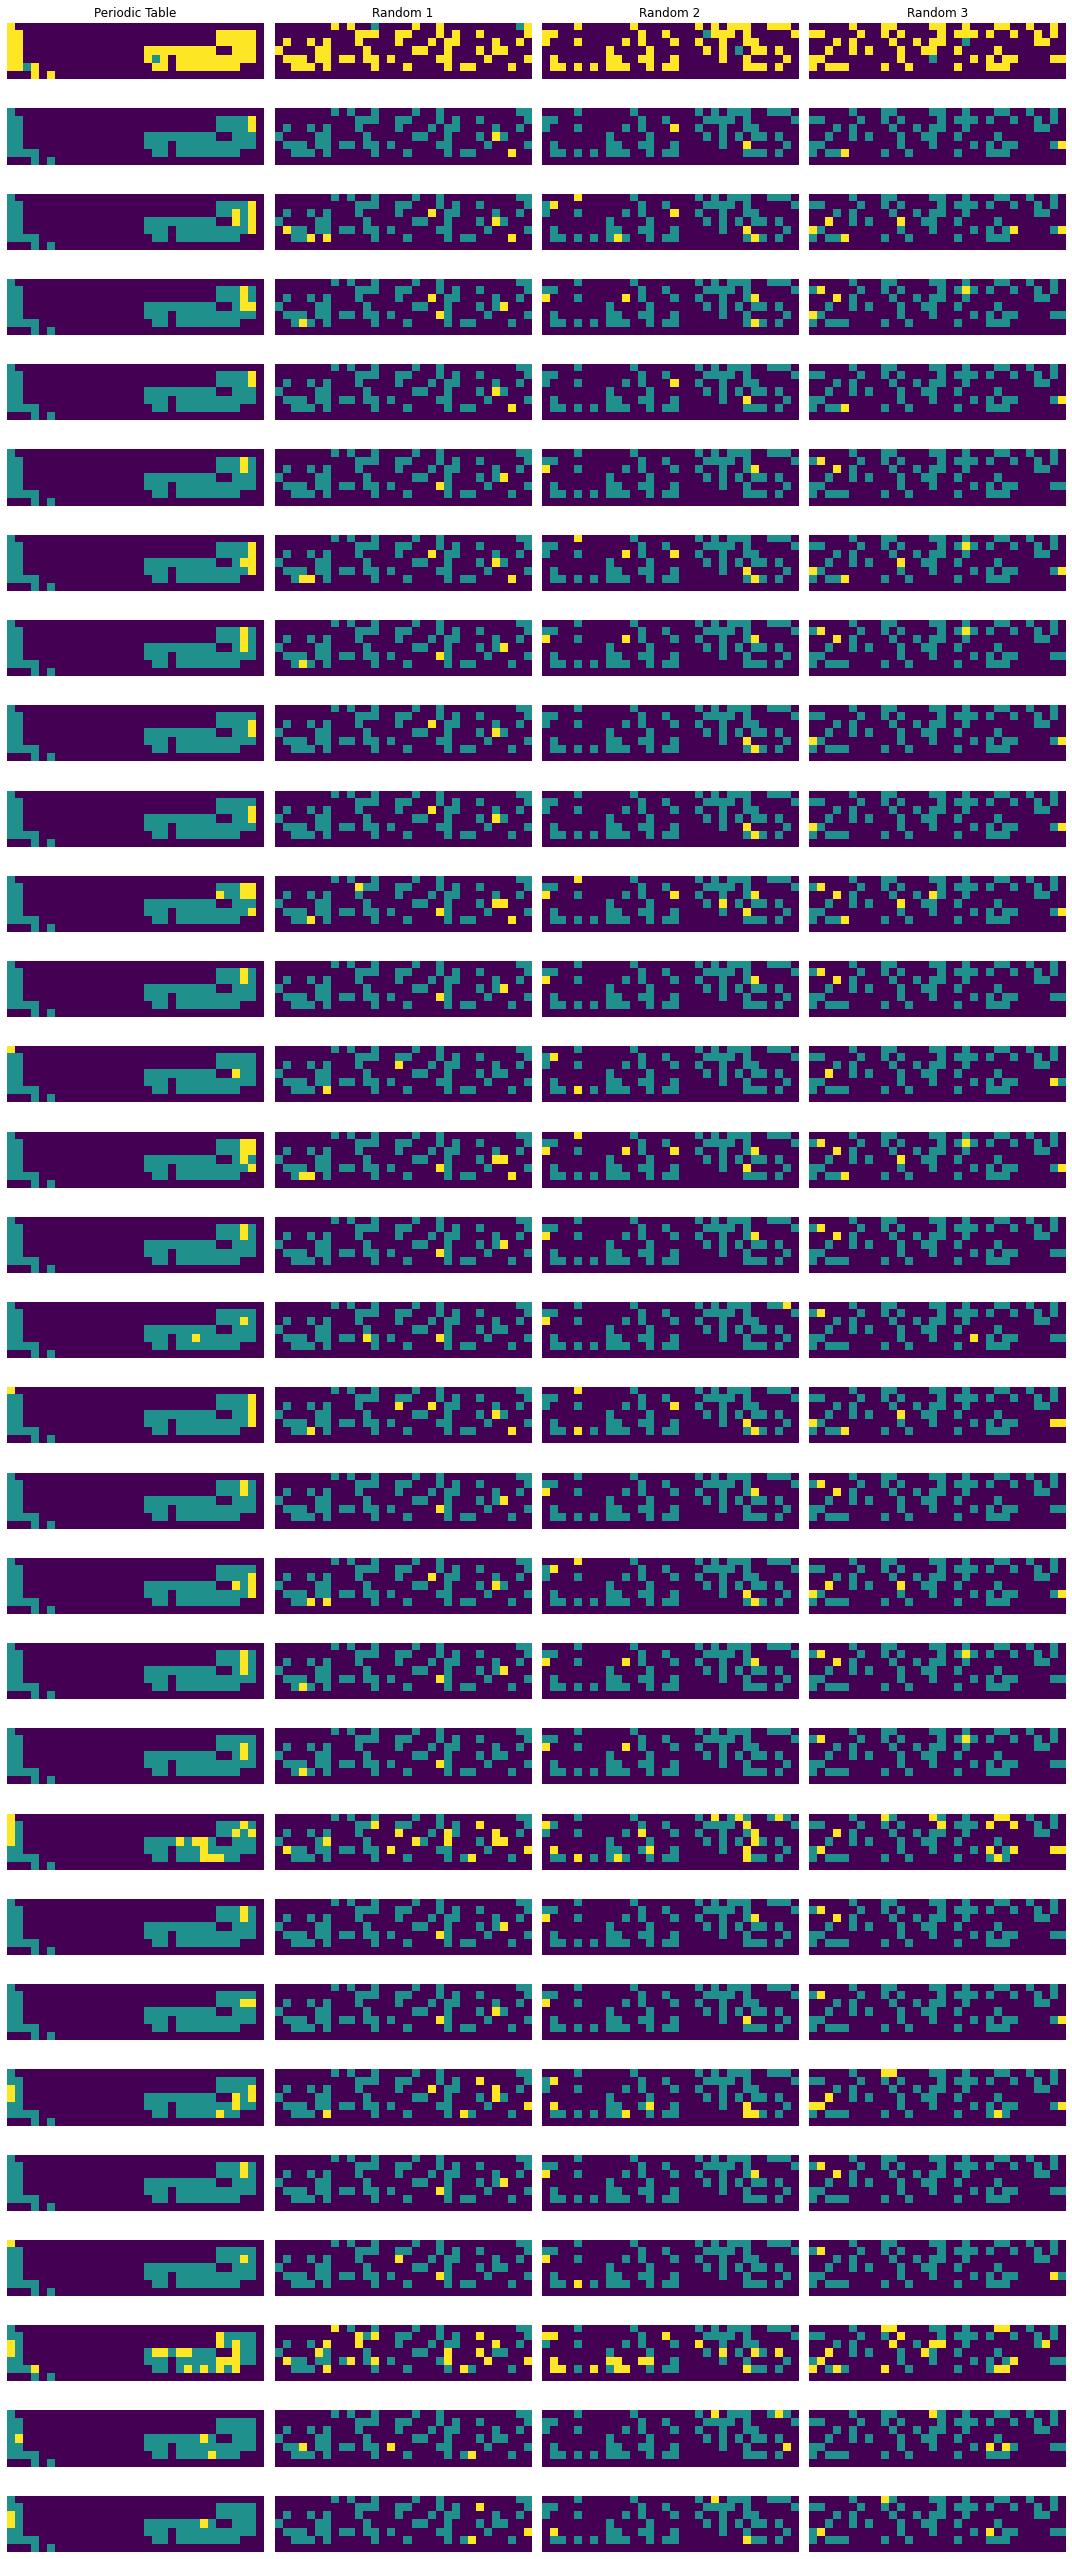

In [235]:
# Load original TP with which this data was created (TP)
from TPs import TP

reprs = [t]
for i in range(3):
    TPrand = getRandPT(TP)
    randTP = translate(t,TP,TPrand)
    reprs.append(randTP)

N = 30
fig,ax = plt.subplots(N,4,figsize=(15,6*N/5))

ax[0,0].set_title('Periodic Table')
ax[0,1].set_title('Random 1')
ax[0,2].set_title('Random 2')
ax[0,3].set_title('Random 3')

for i in range(N):
    for j in range(4):
        ax[i,j].imshow(reprs[j][i])
        ax[i,j].axis('off')
plt.tight_layout()

### This functionality will allow for the production and evaluation of different periodic systems. This also implies for instance optimization, among other posibilities.

---

Let's now see about how many possible PTs we got.

In [1]:
from itertools import permutations
from math import factorial
import numpy as np

N is the total number of different possible positions. e.g. 32*7=224 for long PT

n is the number of elements. e.g. 60 in 1868

### No. unique configurations not keeping order:

\begin{equation}
\frac{N!}{(N-n)!}
\end{equation}

### No. configurations keeping order but not unique:

\begin{equation}
\frac{N!}{n!}
\end{equation}

### No. unique configurations and keeping order:

\begin{equation}
\frac{N!}{(N-n)!n!}
\end{equation}

In [3]:
N = 9     # Numero de posiciones (32*7 para PT)
n = 4     # Numero de elementos (1,2,3,4,...)

zeros = [0]*(N-n) 
unique_elems = [i for i in range(1,n+1)]

perms = np.array(list(permutations(zeros + unique_elems)))

# Según formula, es:

print("No. unique configurations not keeping order:\t",int(factorial(N)/(factorial(N-n))))

print("No. configurations keeping order but not unique:",int(factorial(N)/(factorial(n))))

print("No. unique configurations and keeping order:\t",int(factorial(N)/(factorial(N-n)*factorial(n))))

No. unique configurations not keeping order:	 3024
No. configurations keeping order but not unique: 15120
No. unique configurations and keeping order:	 126


In [4]:
#No. unique configurations not keeping order
a = np.unique(perms,axis=0)   # Take only unique permutations (that is, make all zeros equal)
a.shape[0]

3024

In [5]:
condition = True
for i in unique_elems[:-1]:
    tmp_i = (perms == i).nonzero()[1]  # Get index of element i in permutation
    tmp_i_1 = (perms == i+1).nonzero()[1]  # Get index of element i+1 in permutation
    
    condition = condition & (tmp_i < tmp_i_1)
    
#No. configurations keeping order but not unique
a = perms[condition]
a.shape[0]

15120

In [13]:
uniqs = np.unique(a,axis=0)
uniqs.shape[0]

126

In [14]:
import sys
np.set_printoptions(threshold=sys.maxsize)

uniqs[0:30]

array([[0, 0, 0, 0, 0, 1, 2, 3, 4],
       [0, 0, 0, 0, 1, 0, 2, 3, 4],
       [0, 0, 0, 0, 1, 2, 0, 3, 4],
       [0, 0, 0, 0, 1, 2, 3, 0, 4],
       [0, 0, 0, 0, 1, 2, 3, 4, 0],
       [0, 0, 0, 1, 0, 0, 2, 3, 4],
       [0, 0, 0, 1, 0, 2, 0, 3, 4],
       [0, 0, 0, 1, 0, 2, 3, 0, 4],
       [0, 0, 0, 1, 0, 2, 3, 4, 0],
       [0, 0, 0, 1, 2, 0, 0, 3, 4],
       [0, 0, 0, 1, 2, 0, 3, 0, 4],
       [0, 0, 0, 1, 2, 0, 3, 4, 0],
       [0, 0, 0, 1, 2, 3, 0, 0, 4],
       [0, 0, 0, 1, 2, 3, 0, 4, 0],
       [0, 0, 0, 1, 2, 3, 4, 0, 0],
       [0, 0, 1, 0, 0, 0, 2, 3, 4],
       [0, 0, 1, 0, 0, 2, 0, 3, 4],
       [0, 0, 1, 0, 0, 2, 3, 0, 4],
       [0, 0, 1, 0, 0, 2, 3, 4, 0],
       [0, 0, 1, 0, 2, 0, 0, 3, 4],
       [0, 0, 1, 0, 2, 0, 3, 0, 4],
       [0, 0, 1, 0, 2, 0, 3, 4, 0],
       [0, 0, 1, 0, 2, 3, 0, 0, 4],
       [0, 0, 1, 0, 2, 3, 0, 4, 0],
       [0, 0, 1, 0, 2, 3, 4, 0, 0],
       [0, 0, 1, 2, 0, 0, 0, 3, 4],
       [0, 0, 1, 2, 0, 0, 3, 0, 4],
       [0, 0, 1, 2, 0, 0, 3,

In [18]:
i=100

print(uniqs[i])
print()
print(uniqs[i].reshape(3,3))

[1 0 2 3 0 0 0 0 4]

[[1 0 2]
 [3 0 0]
 [0 0 4]]


## That said, how many different possible PTs exist where the order is preserved?

In [32]:
N = 30*7     # Numero de posiciones (32*7)
n = 60     # Numero de elementos (1,2,3,4,...)

print("No. unique configurations not keeping order:\t",factorial(N)/(factorial(N-n)))

#print("No. configurations keeping order but not unique:",factorial(N)//(factorial(n)))

print("No. unique configurations and keeping order:\t",factorial(N)/(factorial(N-n)*factorial(n)))

print(f"\nDifference is a factor of:\t\t\t {factorial(n):.15e}")

No. unique configurations not keeping order:	 1.8522056472827472e+135
No. unique configurations and keeping order:	 2.225944617131523e+53

Difference is a factor of:			 8.320987112741390e+81
